# Deep Neural Network using Keras

In [1]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers

import random
import numpy as np

2021-12-18 09:07:04.079932: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-18 09:07:04.079967: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of 
                        # numbers will appear every time. 
#tf.set_random_seed(42)  # sets the graph-level random seed

## Dataset

In [4]:
# Use the MNIST dataset  of Keras.

mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain) , (Xtest, Ytest) = mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(Xtrain[0,:,:], cmap='gray')
plt.title("Ground Truth (Train) : {}".format(Ytrain[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(Xtest[0,:,:], cmap='gray')
plt.title("Ground Truth (Test): {}".format(Ytest[0]))

In [ ]:
# size of the datsets

print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

In [ ]:
# print a sample data

print('Xtrain \n', Xtrain[10,10])
print('Xtest \n', Xtest[10,10])
print('Ytrain \n', Ytrain[10,])
print('Ytest \n', Ytest[10,])

In [5]:
# Normalize the data
# 60000 input images are in the train set.
# 10000 input images are in the test set.

Xtrain = Xtrain.reshape((60000, 28*28))    # reshape the input set to size 28*28. 
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

Xtest = Xtest.reshape((10000, 28*28))      # reshape the input set to size 28*28. 
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

In [ ]:
# print a sample data

print('Xtrain \n', Xtrain[10,10])
print('Xtest \n', Xtest[10,10])
print('Ytrain \n', Ytrain[10,])
print('Ytest \n', Ytest[10,])

## DNN Model

Using Keras, create the DNN or Sequential Model

In [6]:
# Create a model object

dnnModel = models.Sequential()

2021-12-18 09:08:08.981624: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-18 09:08:08.981768: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-18 09:08:08.981877: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (seetha-HP-348-G4): /proc/driver/nvidia/version does not exist
2021-12-18 09:08:08.982836: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [7]:
# Layer 1 = hidden layer
# specify the input size in the first layer.MLP

dnnModel.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))

# Layer 2 = hidden layer 
dnnModel.add(layers.Dense(60, activation='relu'))

# Layer 3 = hidden layer 
dnnModel.add(layers.Dense(30, activation='relu'))


# Layer 4 = output layer
# number of neurons = number of classes = 10
dnnModel.add(layers.Dense(10, activation='softmax'))

dnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 60)                3060      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 44,450
Trainable params: 44,450
Non-trainable params: 0
_________________________________________________________________


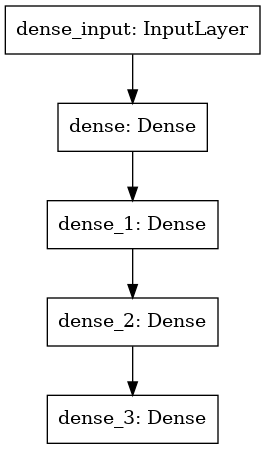

In [17]:
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(dnnModel, to_file='2A DNN.png')
from IPython.display import Image
Image(filename='2A DNN.png') 

## Regularization and Optimizations of DNN

In [8]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
        
dnnModel.compile( optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy'] )

## Train the Model

In [18]:
# train the model



h  = dnnModel.fit( Xtrain, Ytrain, epochs=25, validation_split=0.1, batch_size=64)

Epoch 1/25
 40/844 [>.............................] - ETA: 2s - loss: 0.0747 - accuracy: 0.9770

2021-12-18 09:25:02.263355: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 169344000 exceeds 10% of free system memory.


844/844 [==============================] - 3s 3ms/step - loss: 0.0848 - accuracy: 0.9750 - val_loss: 0.0714 - val_accuracy: 0.9790
Epoch 2/25
844/844 [==============================] - 2s 2ms/step - loss: 0.0821 - accuracy: 0.9761 - val_loss: 0.0730 - val_accuracy: 0.9802
Epoch 3/25
844/844 [==============================] - 2s 2ms/step - loss: 0.0793 - accuracy: 0.9769 - val_loss: 0.0706 - val_accuracy: 0.9798
Epoch 4/25
844/844 [==============================] - 2s 3ms/step - loss: 0.0769 - accuracy: 0.9771 - val_loss: 0.0753 - val_accuracy: 0.9795
Epoch 5/25
844/844 [==============================] - 3s 3ms/step - loss: 0.0749 - accuracy: 0.9782 - val_loss: 0.0739 - val_accuracy: 0.9787
Epoch 6/25
844/844 [==============================] - 3s 3ms/step - loss: 0.0727 - accuracy: 0.9789 - val_loss: 0.0740 - val_accuracy: 0.9802
Epoch 7/25
844/844 [==============================] - 2s 3ms/step - loss: 0.0707 - accuracy: 0.9795 - val_loss: 0.0751 - val_accuracy: 0.9797
Epoch 8/25
844/84

In [20]:
#print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy ', h.history['accuracy'][-1])
#print('Final training loss \t', h.history['val_loss'][-1])
print('Final validation accuracy ', h.history['val_accuracy'][-1])

Final training accuracy  0.9878148436546326
Final validation accuracy  0.9786666631698608


## Testing the Model

In [21]:
# testing the model

testLoss, testAccuracy = dnnModel.evaluate( Xtest, Ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0992 - accuracy: 0.9722


In [13]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.11252103000879288
Testing accuracy  0.965499997138977


In [23]:
num_classes = 9

#traget names
target_names = ["Class {}".format(i) for i in range(num_classes)]

Ytrue = np.argmax(Ytest,axis = 1)

# Predict Labels
Ypredicted = dnnModel.predict(Xtest)
Ypredicted = np.argmax(np.round(Ypredicted),axis=1)


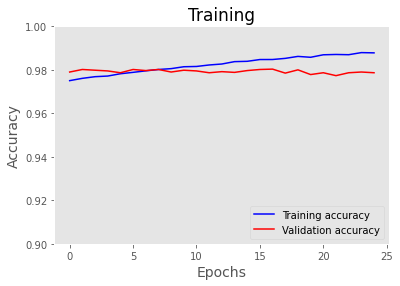

In [44]:
import matplotlib.pyplot as plt 

accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']

# plot loss and accuracy
epochs = range(len(accuracy))

plt.style.use('ggplot')
plt.plot(epochs, accuracy, 'blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.yticks((0.9,0.92,0.94,0.96,0.98,1.0))
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training', fontsize=17)
plt.legend(loc='lower right') 
plt.grid(None)

plt.show()

[[ 967    0    0    1    2    4    2    1    3    0]
 [   4 1115    2    2    0    2    3    1    6    0]
 [  10    2  996    2    3    1    4    4    9    1]
 [   9    0    3  976    0   10    0    4    5    3]
 [   1    0    5    0  957    0    1    1    0   17]
 [   4    1    0    6    3  858    8    1    5    6]
 [   7    3    1    1    6    2  935    0    3    0]
 [   9    3    6    6    2    0    0  987    3   12]
 [   4    0    4    4    2    5    4    2  946    3]
 [   6    3    0    6   12    5    1    3    3  970]]


<AxesSubplot:>

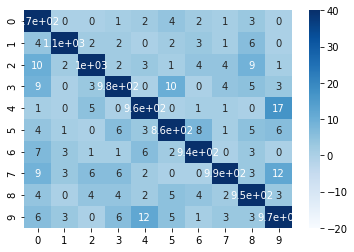

In [24]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Ytrue, Ypredicted)
print(cm)
df_cm = pd.DataFrame(cm)

#plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, vmin=-20, vmax=40, cmap="Blues")


In [31]:
from sklearn.metrics import classification_report

print(classification_report(Ytrue, Ypredicted))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Exercise 

Modify the code to get a better testing accuracy.
- Change the number of hidden units
- Increase the number of hidden layers
- Use a different optimizer